In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import numpy as np

bikes = pd.read_pickle('Data/BikesDataImputed.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [62]:
bikes_sum = bikes.groupby(bikes['Date'].dt.week)['Rental Count'].sum()
temp_mean = bikes.groupby(bikes['Date'].dt.week)['Temperature'].mean()
humidity_mean = bikes.groupby(bikes['Date'].dt.week)['Humidity'].mean()
wind_mean = bikes.groupby(bikes['Date'].dt.week)['Wind speed'].mean()

bikes_weeks = pd.concat([bikes_sum, temp_mean, humidity_mean, wind_mean], axis=1)

<ipython-input-62-5dff97f04ee7>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  bikes_sum = bikes.groupby(bikes['Date'].dt.week)['Rental Count'].sum()
<ipython-input-62-5dff97f04ee7>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  temp_mean = bikes.groupby(bikes['Date'].dt.week)['Temperature'].mean()
<ipython-input-62-5dff97f04ee7>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  humidity_mean = bikes.groupby(bikes['Date'].dt.week)['Humidity'].mean()
<ipython-input-62-5dff97f04ee7>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  wind_mean = bikes.groupby(bikes['Date'].dt.week)['Wind speed'].mean()


* We are investigating a linear relationship
* All variables follow a normal distribution
* There is very little or no multicollinearity
* There is little or no autocorrelation
* Data is homoscedastic

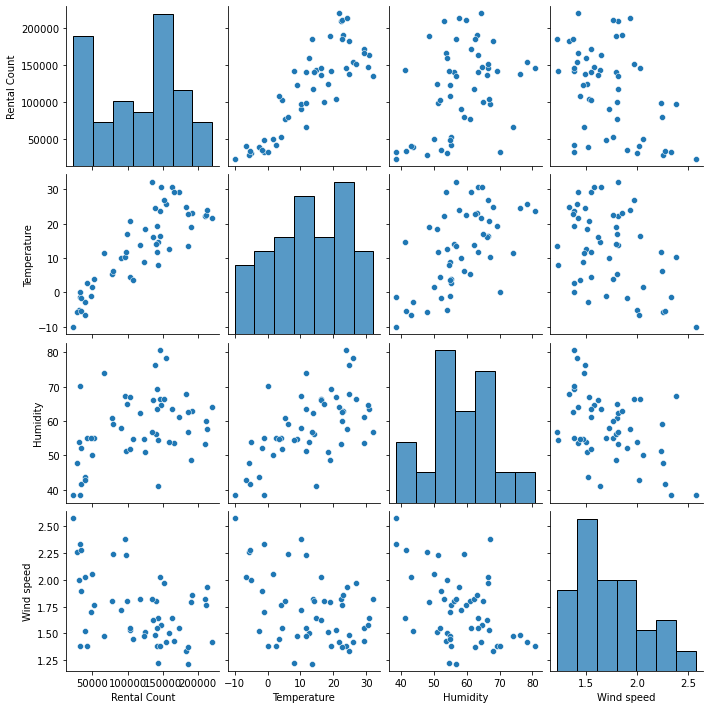

In [63]:
sns.pairplot(bikes_weeks)

In [107]:
X = bikes_weeks['Temperature']
y = bikes_weeks['Rental Count']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=4309.320603391841, intercept=61741.699243285024, rvalue=0.8458075200534889, pvalue=2.992184317240584e-15, stderr=384.39441030665836)


In [108]:
r_sq = res.rvalue ** 2
print(r_sq)

0.7153903609790331


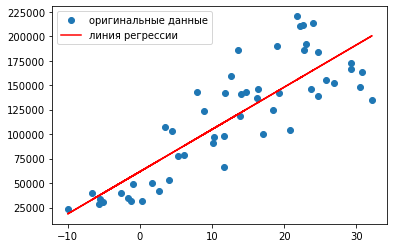

In [109]:
plt.plot(X, y, 'o', label='оригинальные данные')
plt.plot(X, res.intercept + res.slope*X, 'r', label='линия регрессии')
plt.legend()
plt.show()

In [154]:
X_simple = bikes_weeks['Temperature']
y = bikes_weeks['Rental Count']
X_simple_constant = sm.add_constant(X_simple)

mod = sm.OLS(y, X_simple_constant)
res_simple = mod.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:           Rental Count   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     125.7
Date:                Thu, 27 May 2021   Prob (F-statistic):           2.99e-15
Time:                        02:11:35   Log-Likelihood:                -611.13
No. Observations:                  52   AIC:                             1226.
Df Residuals:                      50   BIC:                             1230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.174e+04   6596.057      9.360      

In [155]:
X_mult = bikes_weeks.drop('Rental Count', axis=1)
y = bikes_weeks['Rental Count']
X_mult_constant = sm.add_constant(X_mult)

mod = sm.OLS(y, X_mult_constant)
res_mult = mod.fit()
print(res_mult.summary())

                            OLS Regression Results                            
Dep. Variable:           Rental Count   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     47.63
Date:                Thu, 27 May 2021   Prob (F-statistic):           1.99e-14
Time:                        02:11:39   Log-Likelihood:                -607.91
No. Observations:                  52   AIC:                             1224.
Df Residuals:                      48   BIC:                             1232.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.756e+05   4.61e+04      3.807      

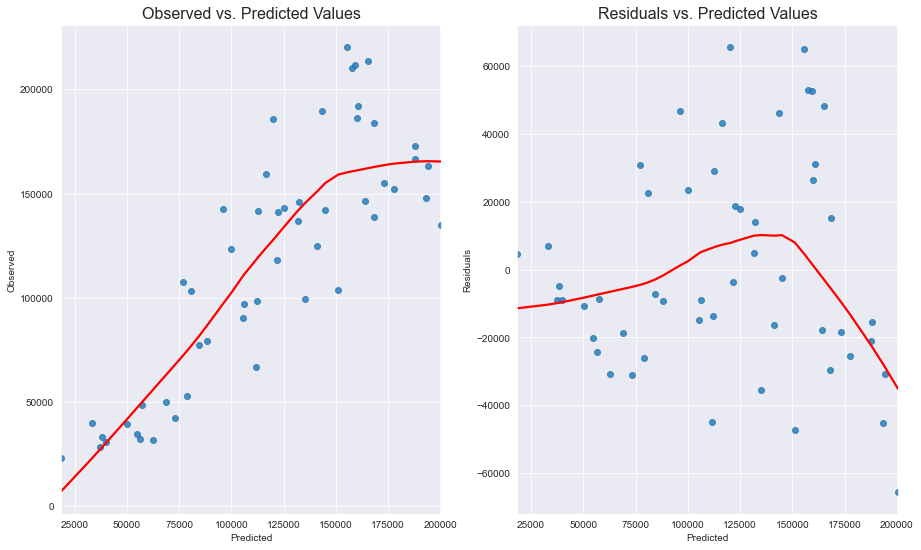

In [157]:
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):

    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(res_simple, y)    

To detect nonlinearity one can inspect plots of observed vs. predicted values or residuals vs. predicted values. The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot or around a horizontal line in the latter one. In both cases with a roughly constant variance.

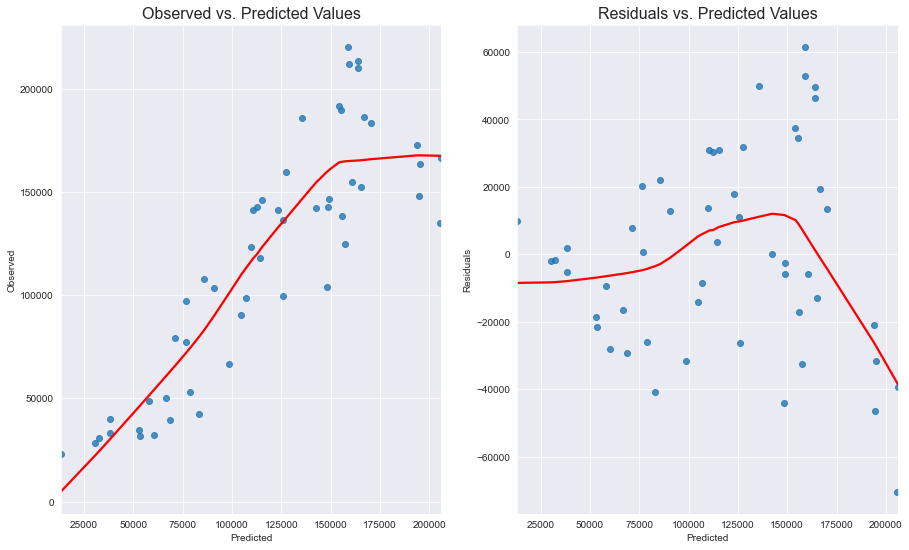

In [158]:
linearity_test(res_mult, y)    

Expectation (mean) of residuals is zero


In [159]:
res_simple.resid.mean()


1.553137106104539e-11

In [160]:
res_mult.resid.mean()


1.3992226181121974e-12

No (perfect) multicollinearity

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_mult_constant.values, i) for i in range(X_mult_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X_mult.columns).T

,Temperature,Humidity,Wind speed
vif,1.591487,1.654481,1.322846


If no features are correlated, then all values for VIF will be 1.
variance inflation factor (фактор, увеличивающий дисперсию)


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  8.269050
p-value                        0.004033
f-value                        9.454459
f p-value                      0.003409

 Goldfeld-Quandt test ----
                value
F statistic  2.282282
p-value      0.024232

 Residuals plots ----


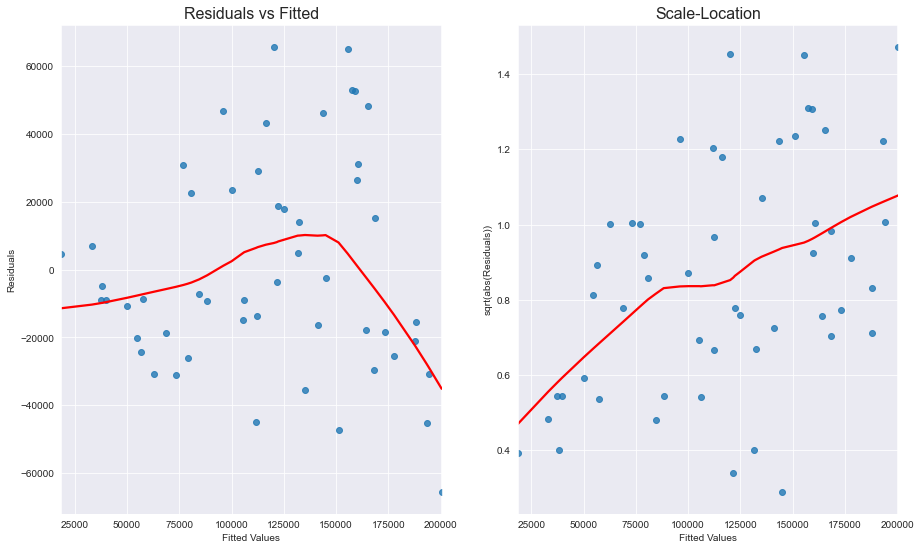

In [170]:
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(res_simple)


 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  15.013140
p-value                         0.001805
f-value                         6.494475
f p-value                       0.000888

 Goldfeld-Quandt test ----
                value
F statistic  2.251067
p-value      0.031669

 Residuals plots ----


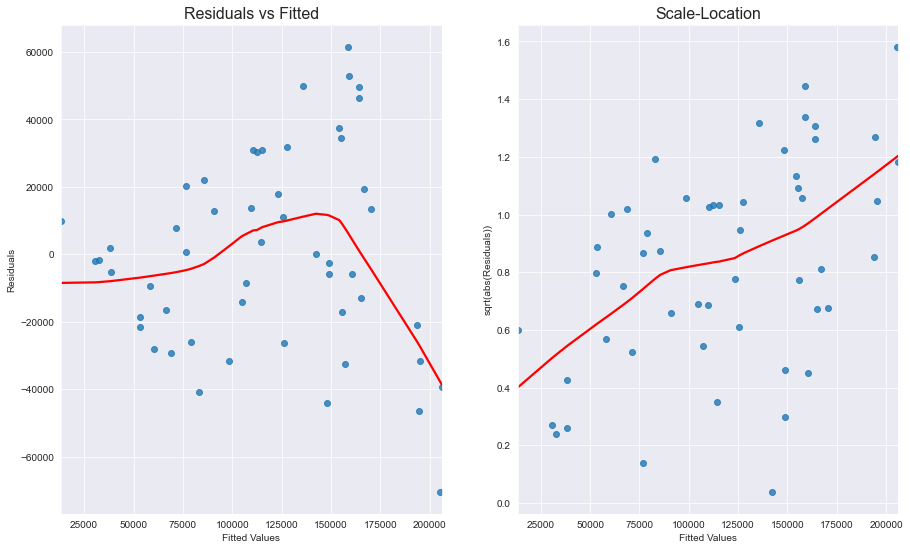

In [171]:
homoscedasticity_test(res_mult)

In [193]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_simple_constant)
lzip(name, test)

[('F statistic', 2.2822819272215717), ('p-value', 0.02423231857133548)]

In [194]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_mult_constant)
lzip(name, test)

[('F statistic', 2.2510666794660854), ('p-value', 0.03166885320825715)]

/Users/rogovich/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


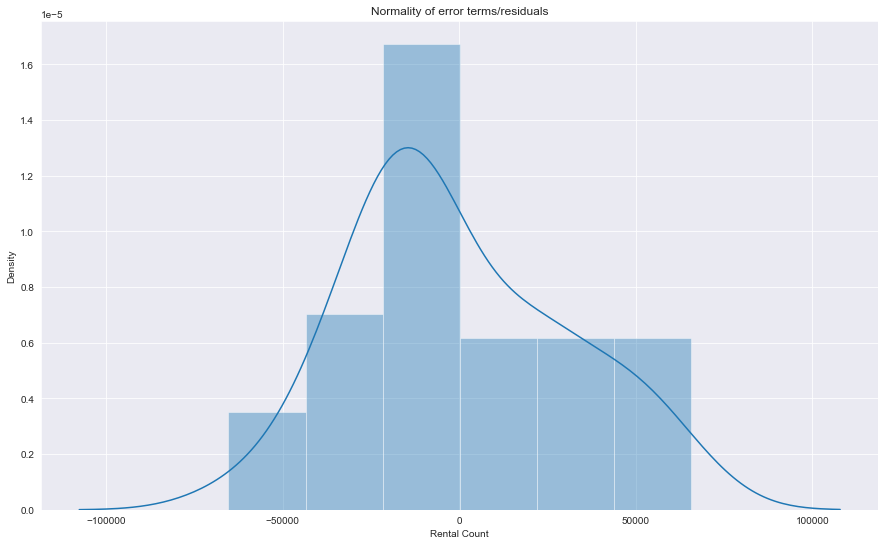

In [196]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

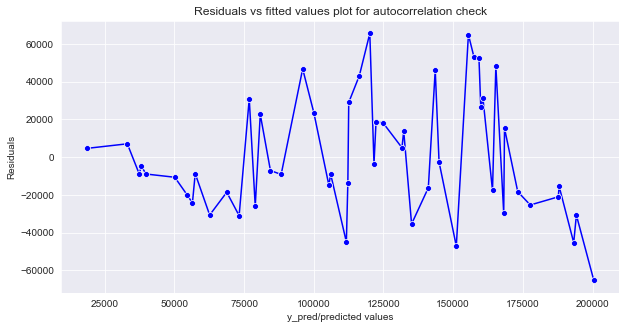

In [199]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [200]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

/Users/rogovich/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


9.117605204815661e-09

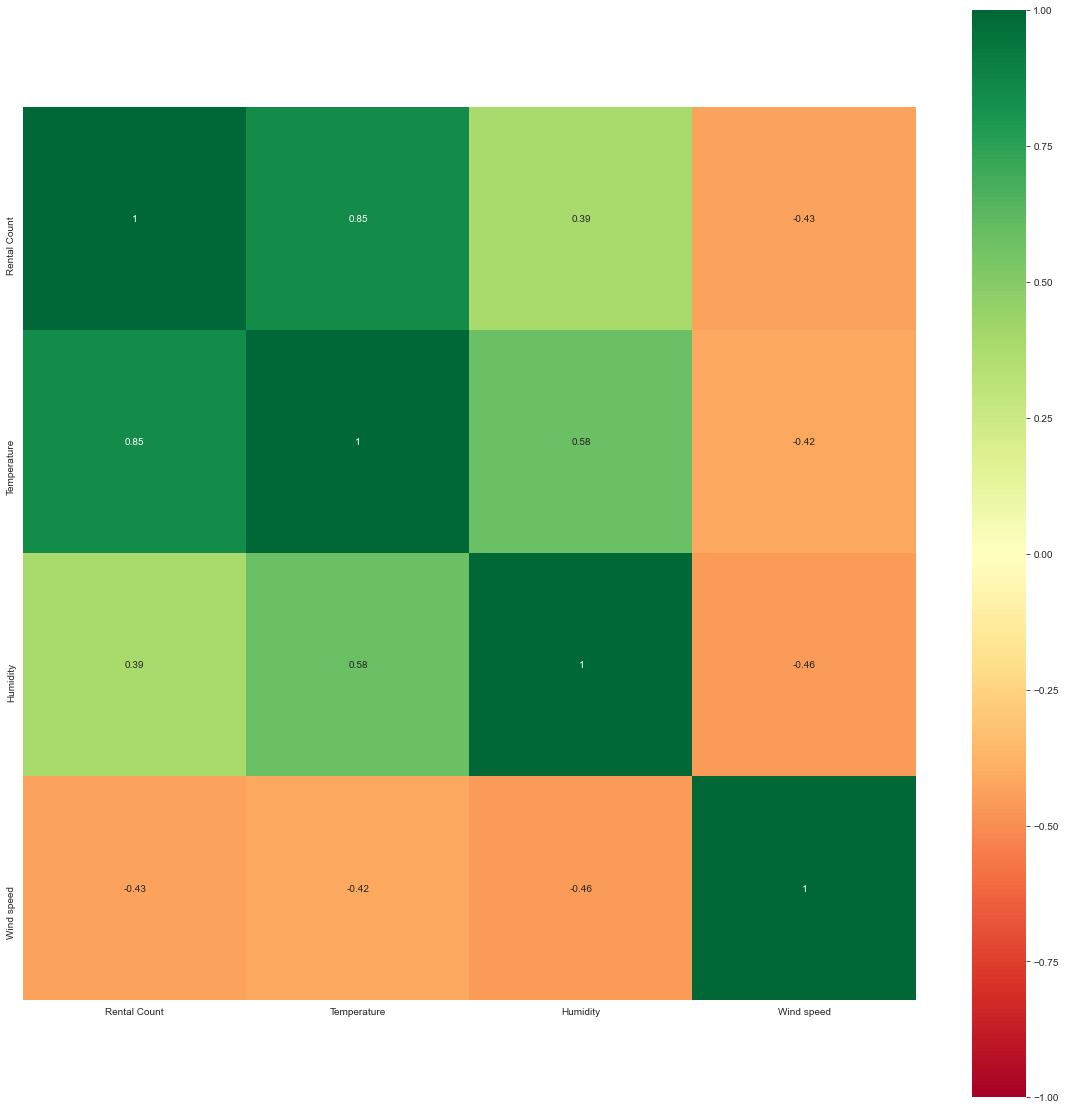

In [204]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(bikes_weeks.corr(), annot=True,cmap='RdYlGn',square=True, vmin=-1, vmax=1)  # seaborn has very simple solution for heatmap